In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

In [5]:
df.head()

Age  Sex  Chest_pain_type  Resting_bp  Cholesterol  Fasting_bs  \
0   52    1                0         125          212           0   
1   53    1                0         140          203           1   
2   70    1                0         145          174           0   
3   61    1                0         148          203           0   
4   62    0                0         138          294           1   

   Resting_ecg  Max_heart_rate  Exercise_induced_angina  ST_depression  \
0            1             168                        0            1.0   
1            0             155                        1            3.1   
2            1             125                        1            2.6   
3            1             161                        0            0.0   
4            1             106                        0            1.9   

   ST_slope  Num_major_vessels  Thallium_test  Condition  
0         2                  2              3          0  
1         0                  0              3          0  
2         0                  0              3          0  
3         2                  1              3          0  
4         1                  3              2          0

In [6]:
df.describe()

Age          Sex  Chest_pain_type   Resting_bp  Cholesterol  \
count  1025.000000  1025.000000      1025.000000  1025.000000   1025.00000   
mean     54.434146     0.695610         0.942439   131.611707    246.00000   
std       9.072290     0.460373         1.029641    17.516718     51.59251   
min      29.000000     0.000000         0.000000    94.000000    126.00000   
25%      48.000000     0.000000         0.000000   120.000000    211.00000   
50%      56.000000     1.000000         1.000000   130.000000    240.00000   
75%      61.000000     1.000000         2.000000   140.000000    275.00000   
max      77.000000     1.000000         3.000000   200.000000    564.00000   

        Fasting_bs  Resting_ecg  Max_heart_rate  Exercise_induced_angina  \
count  1025.000000  1025.000000     1025.000000              1025.000000   
mean      0.149268     0.529756      149.114146                 0.336585   
std       0.356527     0.527878       23.005724                 0.472772   
min       0.000000     0.000000       71.000000                 0.000000   
25%       0.000000     0.000000      132.000000                 0.000000   
50%       0.000000     1.000000      152.000000                 0.000000   
75%       0.000000     1.000000      166.000000                 1.000000   
max       1.000000     2.000000      202.000000                 1.000000   

       ST_depression     ST_slope  Num_major_vessels  Thallium_test  \
count    1025.000000  1025.000000        1025.000000    1025.000000   
mean        1.071512     1.385366           0.754146       2.323902   
std         1.175053     0.617755           1.030798       0.620660   
min         0.000000     0.000000           0.000000       0.000000   
25%         0.000000     1.000000           0.000000       2.000000   
50%         0.800000     1.000000           0.000000       2.000000   
75%         1.800000     2.000000           1.000000       3.000000   
max         6.200000     2.000000           4.000000       3.000000   

         Condition  
count  1025.000000  
mean      0.513171  
std       0.500070  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [7]:
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1025 non-null   int64  
 1   Sex                      1025 non-null   int64  
 2   Chest_pain_type          1025 non-null   int64  
 3   Resting_bp               1025 non-null   int64  
 4   Cholesterol              1025 non-null   int64  
 5   Fasting_bs               1025 non-null   int64  
 6   Resting_ecg              1025 non-null   int64  
 7   Max_heart_rate           1025 non-null   int64  
 8   Exercise_induced_angina  1025 non-null   int64  
 9   ST_depression            1025 non-null   float64
 10  ST_slope                 1025 non-null   int64  
 11  Num_major_vessels        1025 non-null   int64  
 12  Thallium_test            1025 non-null   int64  
 13  Condition                1025 non-null   int64  
dtypes: float64(1), int64(13)

In [8]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

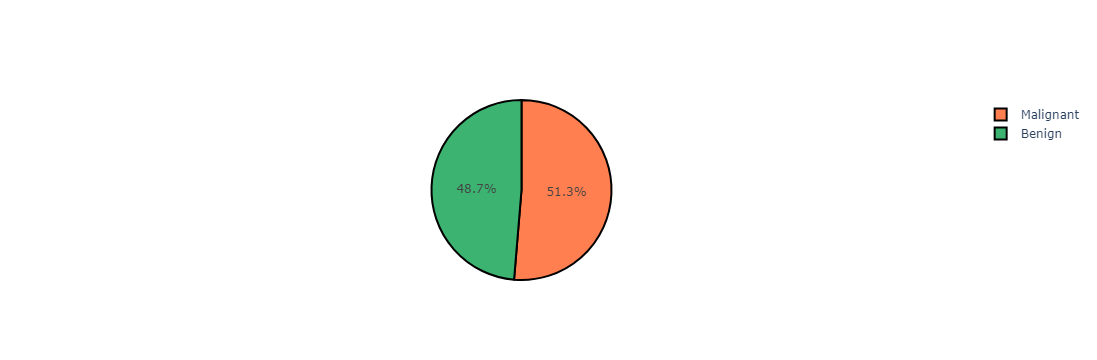

In [9]:
# Make a pie chart of 'Condition' values  Condition: 0 = Benign, 1 = Malignant
results = df['Condition'].value_counts()
values = [results[0], results[1]]
labels = ['Benign', 'Malignant']
colors = ['MediumSeaGreen', 'Coral']
fig_pie = go.Pie(labels=labels, values=values,marker={'colors': colors, 'line': {'color': 'Black', 'width': 2}})
py.iplot([fig_pie])

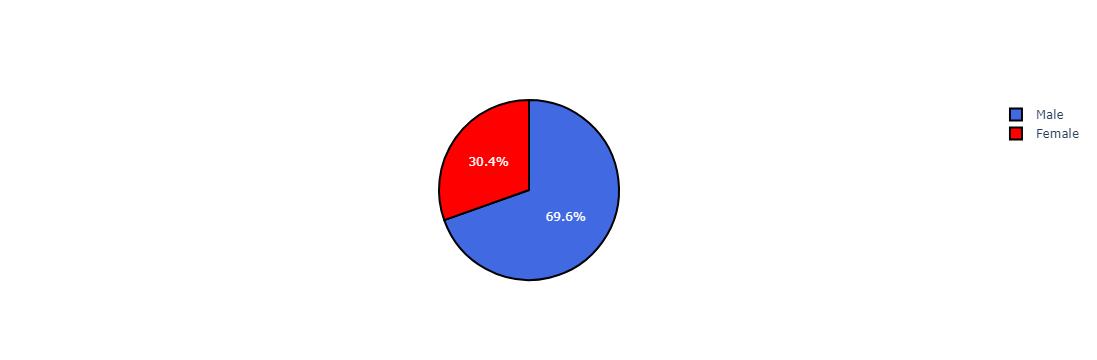

In [10]:
# Make a pie chart of 'Sex' values Sex: 0 = Female, 1 = Male
results = df['Sex'].value_counts()
values = [results[0], results[1]]
labels = ['Female', 'Male']
colors = ['Red', 'RoyalBlue']    
fig_pie = go.Pie(labels=labels, values=values, marker={'colors': colors, 'line': {'color': 'Black', 'width': 2}})
py.iplot([fig_pie])


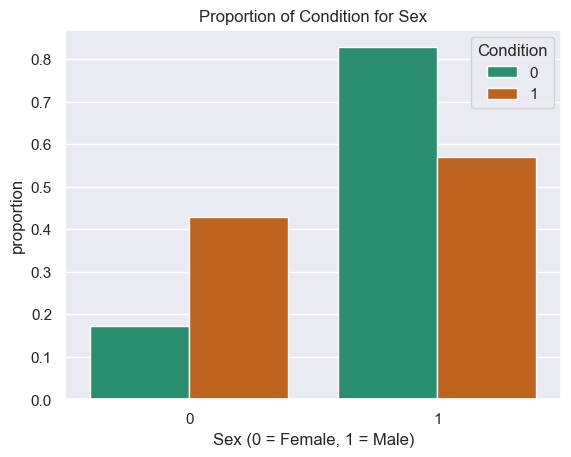

The proportion of Malignant for Sex:
Female: 42.97%
Male: 57.03%


In [11]:
#  Plot a bar chart of the proportion of Conditon vs. Sex. Show the percentage of Malignant for each sex.

# Bivariate analysis: Sex vs. Condition  
df['Sex'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
plt.title('Proportion of Condition for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()
    
    
# female_malignant vs. Malignant
female_malignant = df[df['Sex']==0]['Condition'].sum()/df[df['Condition']==1]['Condition'].count()
# male_malignant vs. Malignant
male_malignant = df[df['Sex']==1]['Condition'].sum()/df[df['Condition']==1]['Condition'].count()
print('The proportion of Malignant for Sex:')
print(f'Female: {female_malignant:.2%}')
print(f'Male: {male_malignant:.2%}')


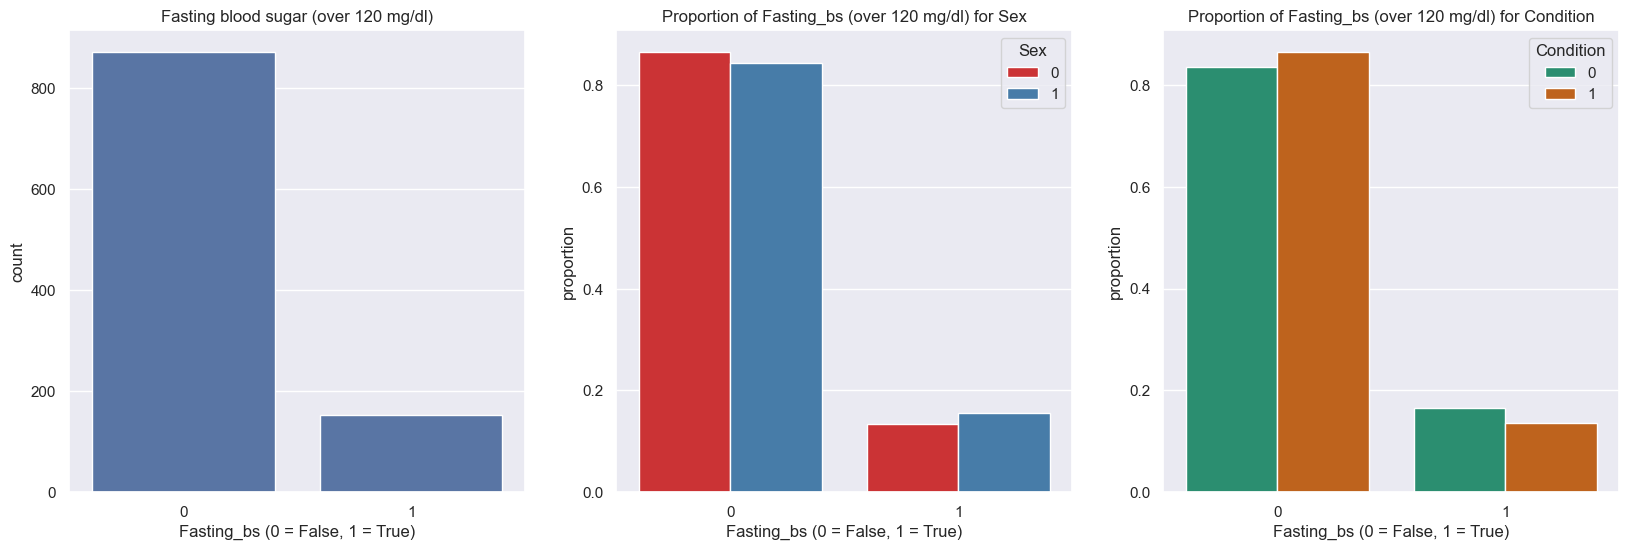

In [12]:
#Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
  
fig = plt.figure(figsize=(20, 6))

# Fasting blood sugar > 120 mg/dl
plt.subplot(1, 3, 1)
sns.countplot(x='Fasting_bs', data=df)
plt.title('Fasting blood sugar (over 120 mg/dl)')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')


# Fasting blood sugar for Sex
plt.subplot(1, 3, 2)
df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')


# Fasting blood sugar for Condition
plt.subplot(1, 3, 3)
df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')
plt.show()

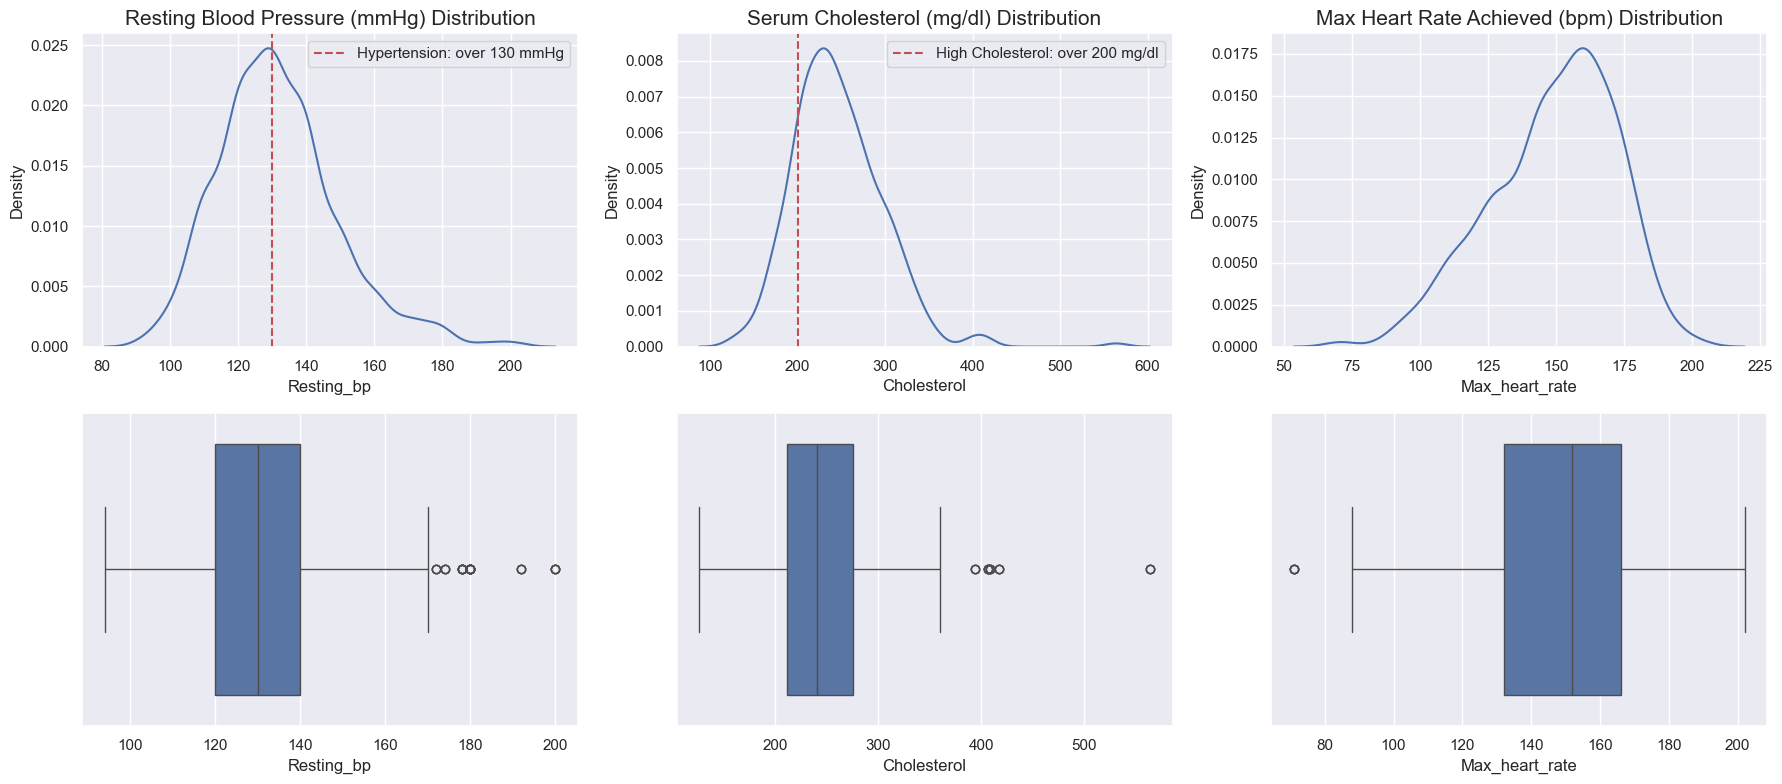

In [13]:
#Show distributions of risk factors, Resting_bp, Chlesterol, and Max_heart_rate

fig = plt.figure(figsize=(18, 8))

# Resting blood pressure
plt.subplot(2, 3, 1)
sns.kdeplot(df['Resting_bp'])
plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
plt.legend()

plt.subplot(2, 3, 4)
sns.boxplot(df['Resting_bp'], orient='h')   


# Serum cholesterol 
plt.subplot(2, 3, 2)
sns.kdeplot(df['Cholesterol'])
plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
plt.legend()

plt.subplot(2, 3, 5)
sns.boxplot(df['Cholesterol'], orient='h')
  

# Maximum heart rate
plt.subplot(2, 3, 3)
sns.kdeplot(df['Max_heart_rate'])
plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

plt.subplot(2, 3, 6)
sns.boxplot(df['Max_heart_rate'], orient='h')

plt.tight_layout()
plt.show()



<Axes: xlabel='Resting_bp', ylabel='Sex'>

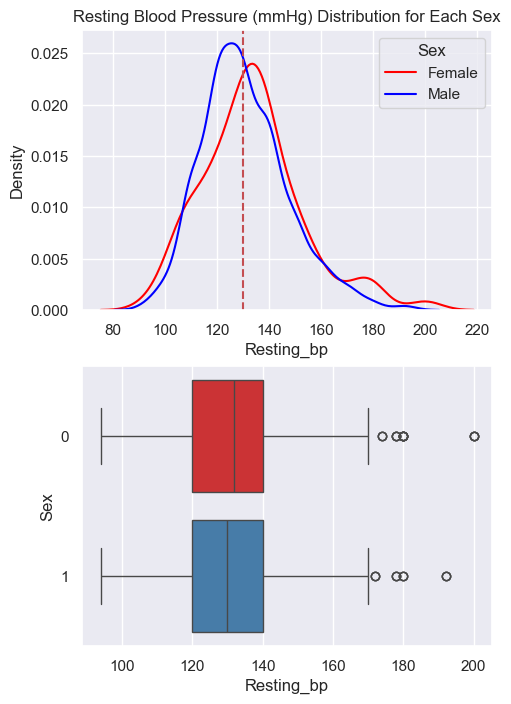

In [14]:
# Show distributions of risk factors for each sex
fig = plt.figure(figsize=(18, 8))

# Resting blood pressure for each sex
plt.subplot(2, 3, 1)
trestbps_female = df[df['Sex']==0]['Resting_bp']
trestbps_male = df[df['Sex']==1]['Resting_bp']
sns.kdeplot(trestbps_female, color='Red')   
sns.kdeplot(trestbps_male, color='Blue')
plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
plt.gca().legend(title='Sex', labels=['Female','Male'])
plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Resting_bp'], y=df['Sex'],palette='Set1', orient='h', hue=df['Sex'], legend=False)

<Axes: xlabel='Cholesterol', ylabel='Sex'>

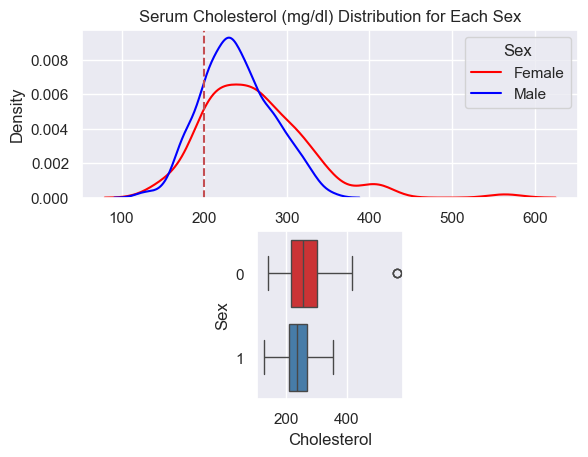

In [15]:
# Serum cholesterol distribution for each sex
plt.subplot(2,1, 1)
chol_female = df[df['Sex']==0]['Cholesterol']
chol_male = df[df['Sex']==1]['Cholesterol']
sns.kdeplot(chol_female, color='Red')   
sns.kdeplot(chol_male, color='Blue')
plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
plt.gca().legend(title='Sex', labels=['Female','Male'])
plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Cholesterol'], y=df['Sex'],palette='Set1', orient='h',hue=df['Sex'],legend=False)

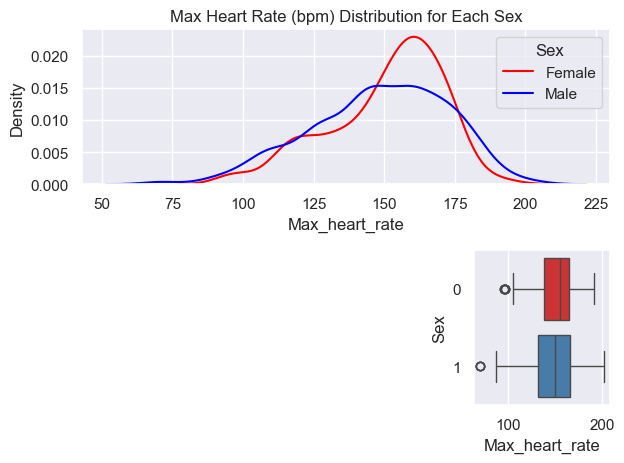

In [19]:
# Max heart rate distribution for each sex 
plt.subplot(2, 1, 1)
thalach_female = df[df['Sex']==0]['Max_heart_rate']
thalach_male = df[df['Sex']==1]['Max_heart_rate']
sns.kdeplot(thalach_female, color='Red')   
sns.kdeplot(thalach_male, color='Blue')
plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
plt.gca().legend(title='Sex', labels=['Female','Male'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Max_heart_rate'], y=df['Sex'], palette='Set1',hue=df['Sex'], legend=False, orient='h')

plt.tight_layout()
plt.show()

<Axes: xlabel='Resting_bp', ylabel='Condition'>

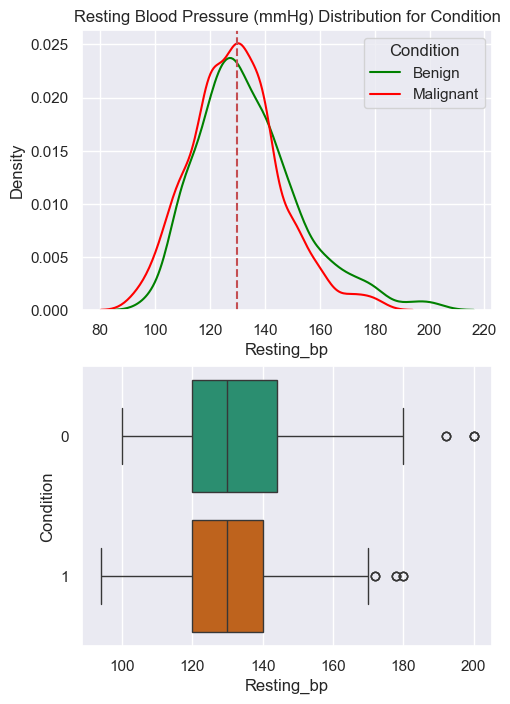

In [20]:
# Show distributions of risk factors for each condition
fig = plt.figure(figsize=(18, 8))

# Resting blood pressure distribution for each condition
plt.subplot(2, 3, 1)
trestbps_b = df[df['Condition']==0]['Resting_bp']
trestbps_m = df[df['Condition']==1]['Resting_bp']
sns.kdeplot(trestbps_b, color='Green')   
sns.kdeplot(trestbps_m, color='Red')
plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
plt.gca().legend(title='Condition', labels=['Benign','Malignant'])  
plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Resting_bp'], y=df['Condition'],orient='h', hue=df['Condition'],legend=False, palette='Dark2')



<Axes: xlabel='Cholesterol', ylabel='Condition'>

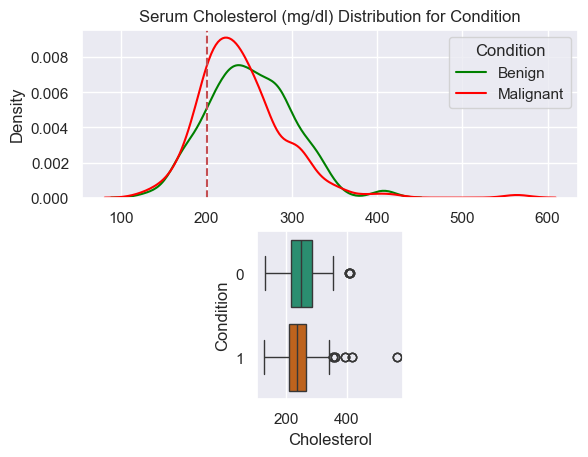

In [21]:
# Serum cholesterol distribution for each condition
plt.subplot(2, 1, 1)
chol_b = df[df['Condition']==0]['Cholesterol']
chol_m = df[df['Condition']==1]['Cholesterol']
sns.kdeplot(chol_b, color='Green')
sns.kdeplot(chol_m, color='Red')
plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Cholesterol'], y=df['Condition'],orient='h', palette='Dark2',legend=False,hue=df['Condition'])

<Axes: xlabel='Max_heart_rate', ylabel='Condition'>

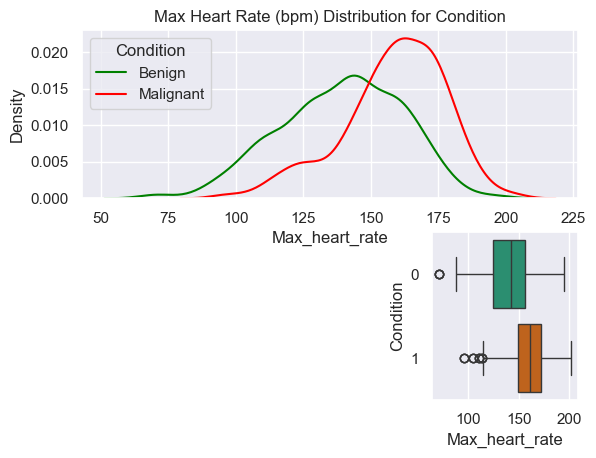

In [22]:
# Max heart rate achieved distribution for each condition
plt.subplot(2, 1, 1)
thalach_b = df[df['Condition']==0]['Max_heart_rate']
thalach_m = df[df['Condition']==1]['Max_heart_rate']
sns.kdeplot(thalach_b, color='Green')
sns.kdeplot(thalach_m, color='Red')
plt.title('Max Heart Rate (bpm) Distribution for Condition')
plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Max_heart_rate'], y=df['Condition'],orient='h', palette='Dark2',hue=df['Condition'],legend=False)

Text(0.5, 1.0, 'Exercise Induced Angina')

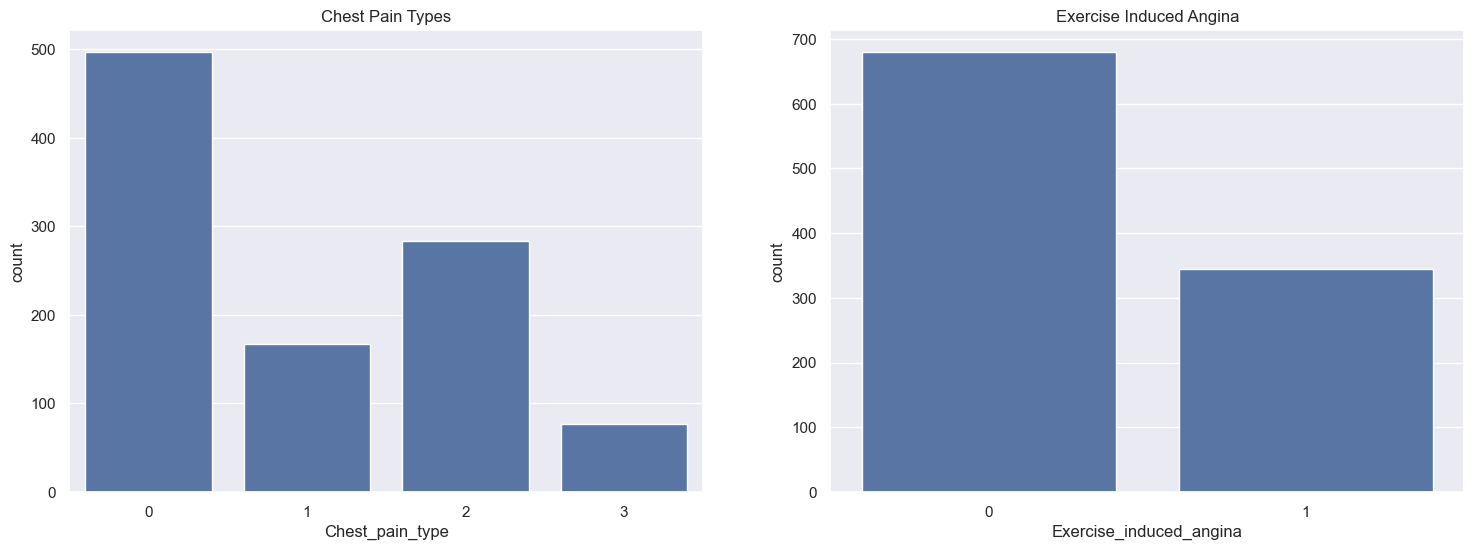

In [23]:
# Count the number of Chest_pain_type and Exercise_induced_angina values.
plt.figure(figsize=(18, 6))

# Chest pain types
plt.subplot(1, 2, 1)
sns.countplot(x='Chest_pain_type', data=df)
plt.title('Chest Pain Types')


# Exercise induced angina
plt.subplot(1, 2, 2)
sns.countplot(x='Exercise_induced_angina', data=df)
plt.title('Exercise Induced Angina')

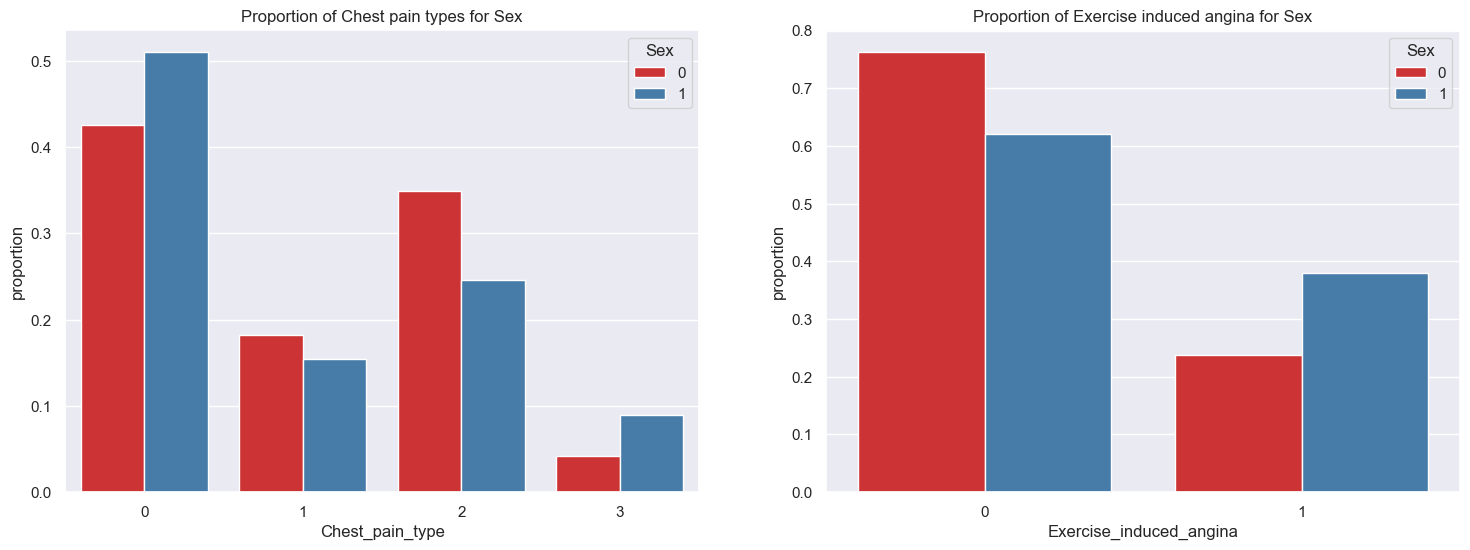

In [24]:
# Plot bar charts of chest pain type and exercise induced angina for Sex.

fig = plt.figure(figsize=(18, 6))

# Chest pain types for Sex 
plt.subplot(1, 2, 1)
df['Chest_pain_type'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Chest pain types for Sex')


# Exercise induced angina for Sex
plt.subplot(1, 2, 2)
df['Exercise_induced_angina'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Exercise induced angina for Sex')
plt.show()


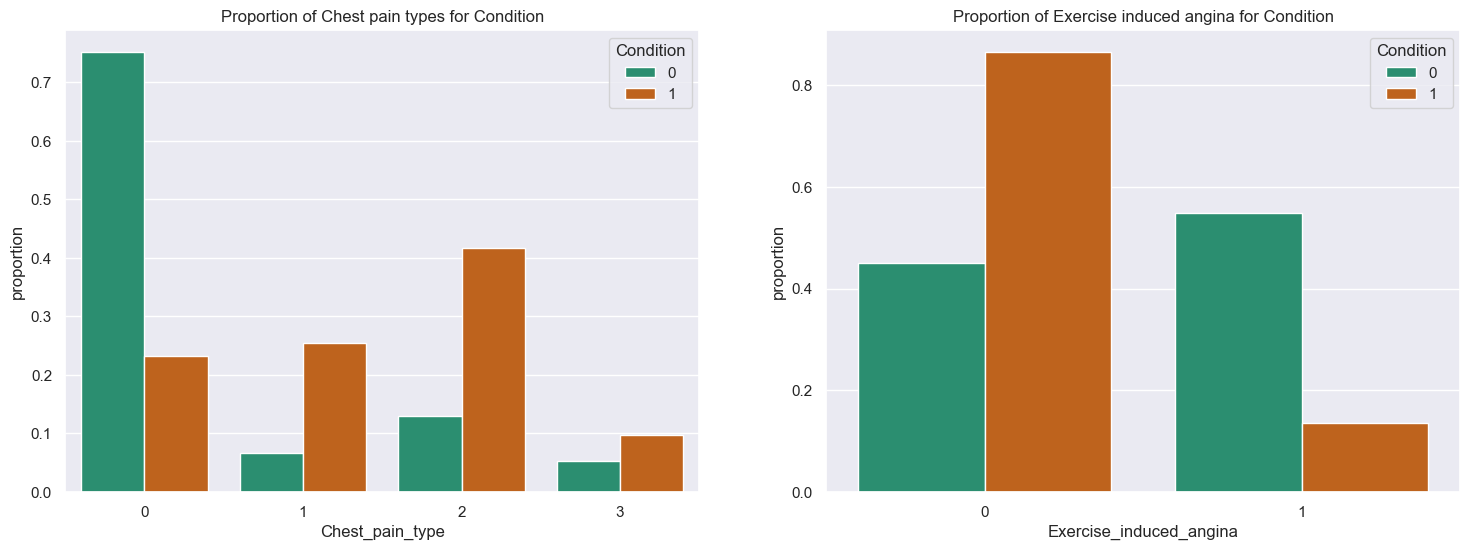

In [25]:
#  Plot bar charts of chest pain type and exercise induced angina for Condition.
fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
df['Chest_pain_type'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
plt.title('Proportion of Chest pain types for Condition')

plt.subplot(1, 2, 2)
df['Exercise_induced_angina'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
plt.title('Proportion of Exercise induced angina for Condition')
plt.show()
    


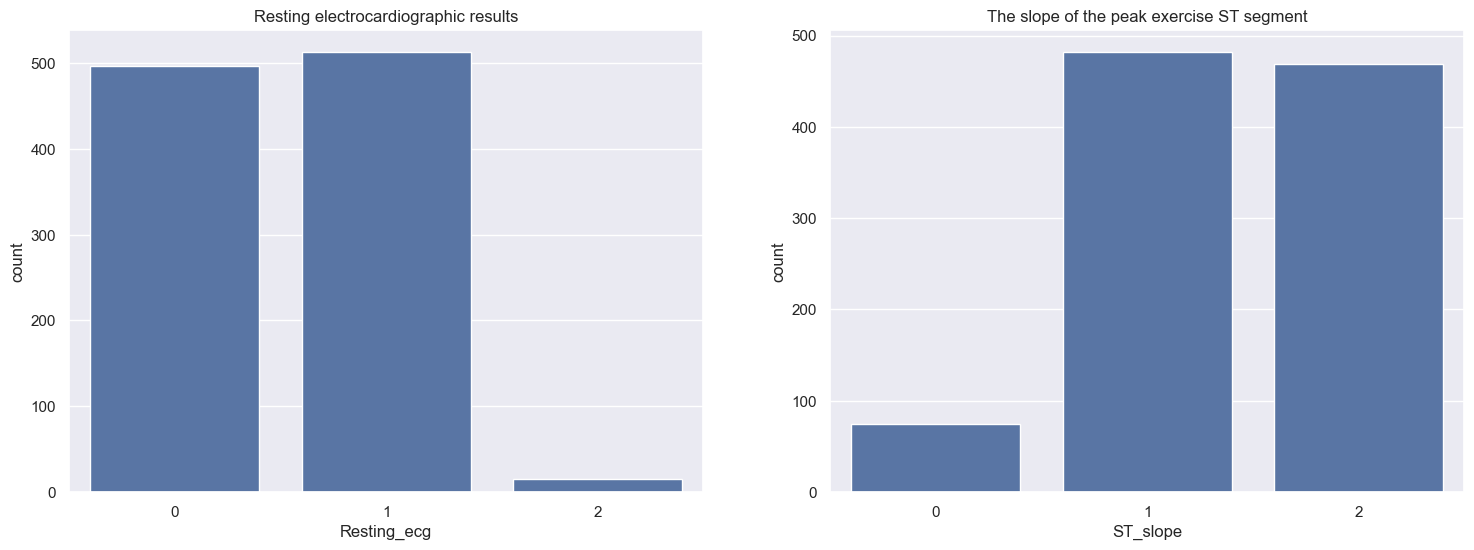

In [26]:
# Make a bar chart of Resting_ecg and ST_slope.
plt.figure(figsize=(18, 6))

# Resting_ecg
plt.subplot(1, 2, 1)
sns.countplot(x='Resting_ecg', data=df)
plt.title('Resting electrocardiographic results')

# ST_slope
plt.subplot(1, 2, 2)
sns.countplot(x='ST_slope', data=df)
plt.title('The slope of the peak exercise ST segment')
plt.show()


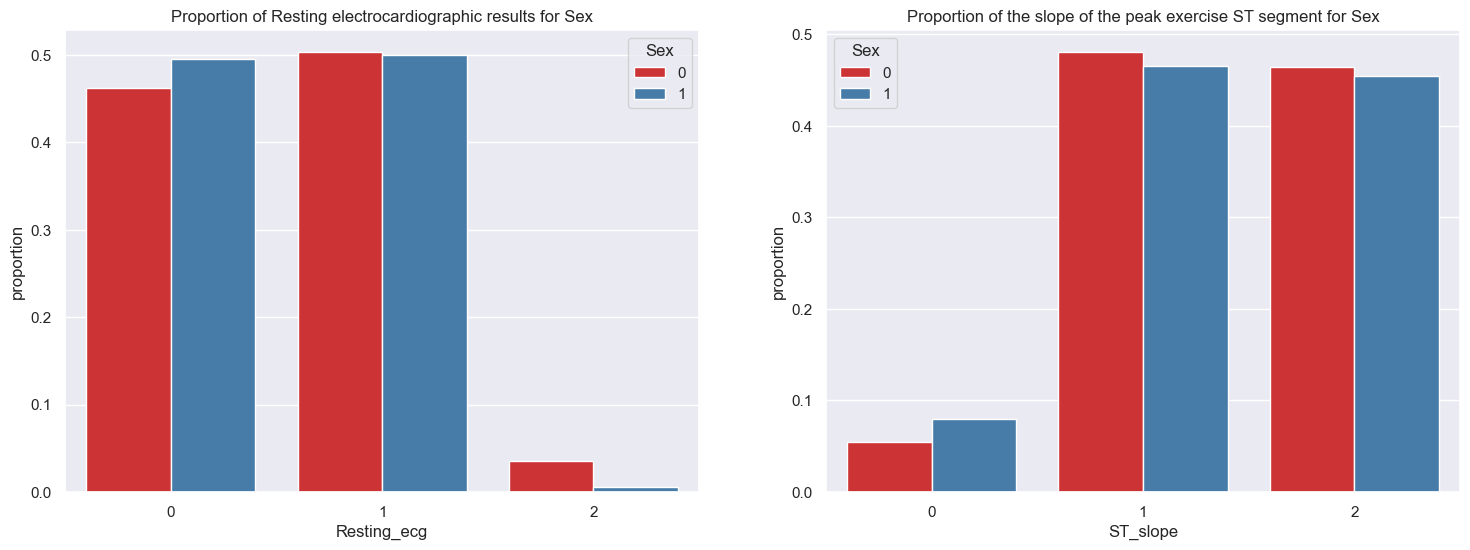

In [27]:
# Plot the proportion of Resting_exc and ST_slope for Sex.

plt.figure(figsize=(18, 6))

# Resting_ecg
plt.subplot(1, 2, 1)
df['Resting_ecg'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Resting electrocardiographic results for Sex')

# ST_slope
plt.subplot(1, 2, 2)
df['ST_slope'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
plt.show()
    

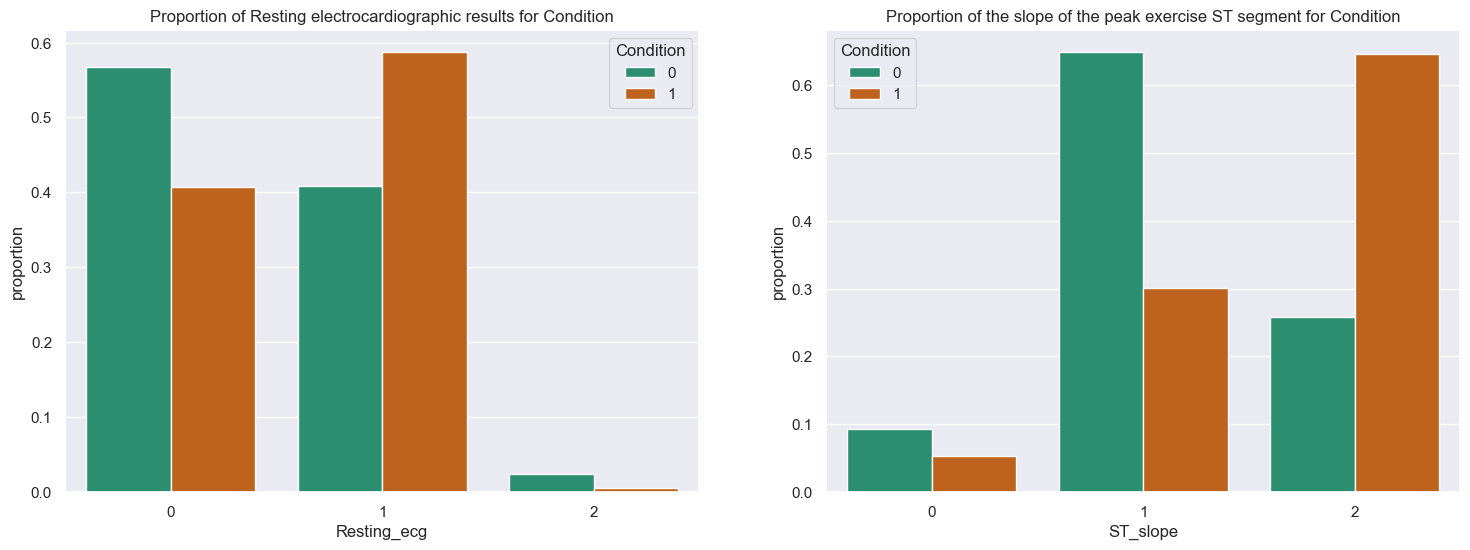

In [28]:
# Plot the proportion of Resting_exc and ST_slope for Condition.

plt.figure(figsize=(18, 6))

# Resting_ecg
plt.subplot(1, 2, 1)
df['Resting_ecg'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
plt.title('Proportion of Resting electrocardiographic results for Condition')


# ST_slope
plt.subplot(1, 2, 2)
df['ST_slope'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
plt.show()


<Axes: xlabel='ST_depression'>

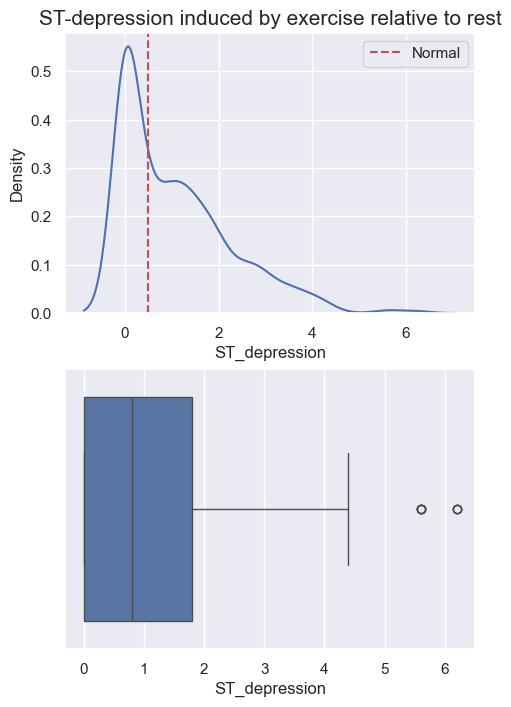

In [29]:
# Make a standard distribution of ST_depression and distributions for Sex and Condition.
   
fig = plt.figure(figsize=(18, 8))

# ST-depression induced by exercise relative to rest
plt.subplot(2, 3, 1)
sns.kdeplot(df['ST_depression'])
plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
plt.legend()

plt.subplot(2, 3, 4)
sns.boxplot(df['ST_depression'], orient='h') 
 

<Axes: xlabel='ST_depression', ylabel='Sex'>

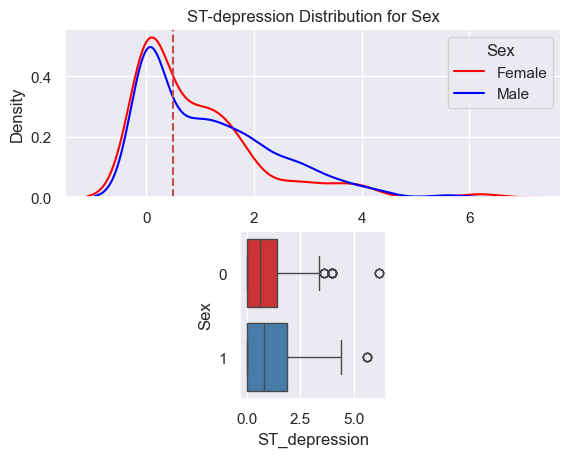

In [30]:

# ST-depression for Sex
plt.subplot(2, 1, 1)
chol_female = df[df['Sex']==0]['ST_depression']
chol_male = df[df['Sex']==1]['ST_depression']
sns.kdeplot(chol_female, color='Red')   
sns.kdeplot(chol_male, color='Blue')
plt.title('ST-depression Distribution for Sex')
plt.gca().legend(title='Sex', labels=['Female','Male'])
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['ST_depression'], y=df['Sex'],palette='Set1', orient='h',hue=df['Sex'],legend=False)





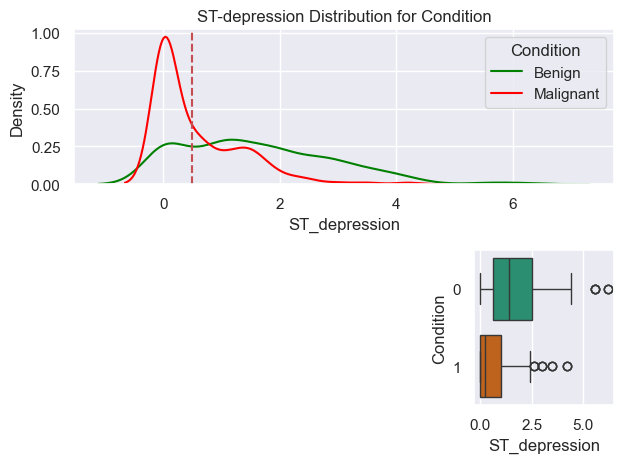

In [31]:
# ST-depression for Condition
plt.subplot(2, 1, 1)
thalach_b = df[df['Condition']==0]['ST_depression']
thalach_m = df[df['Condition']==1]['ST_depression']
sns.kdeplot(thalach_b, color='Green')
sns.kdeplot(thalach_m, color='Red')
plt.title('ST-depression Distribution for Condition')
plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['ST_depression'], y=df['Condition'],palette='Dark2', orient='h',hue=df['Condition'],legend=False)

plt.tight_layout()
plt.show()


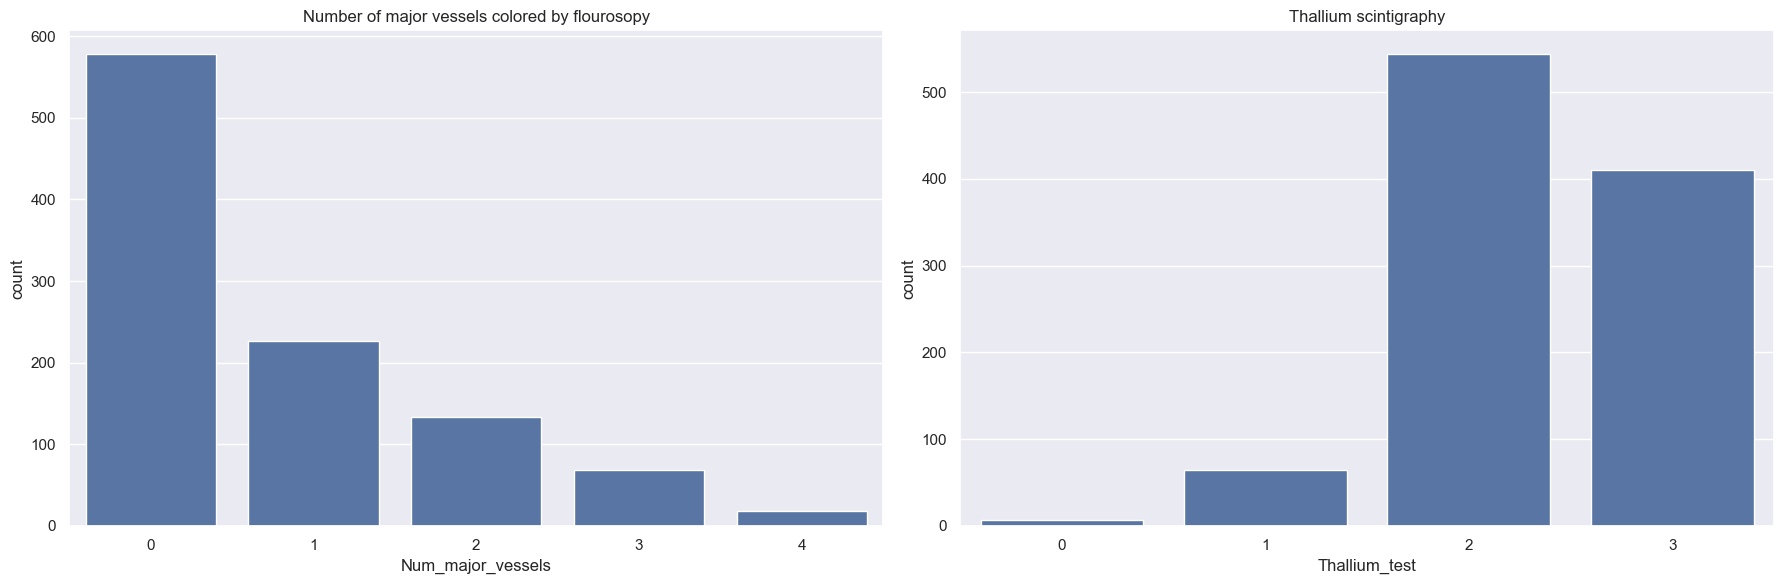

In [32]:
#  EDA with numeric variables

fig = plt.figure(figsize=(18, 6))

# Num_major_vessels
plt.subplot(1, 2, 1)
sns.countplot(x='Num_major_vessels', data=df)
plt.title('Number of major vessels colored by flourosopy')

# Thallium
plt.subplot(1, 2, 2)
sns.countplot(x='Thallium_test', data=df)
plt.title('Thallium scintigraphy')

plt.tight_layout()
plt.show()

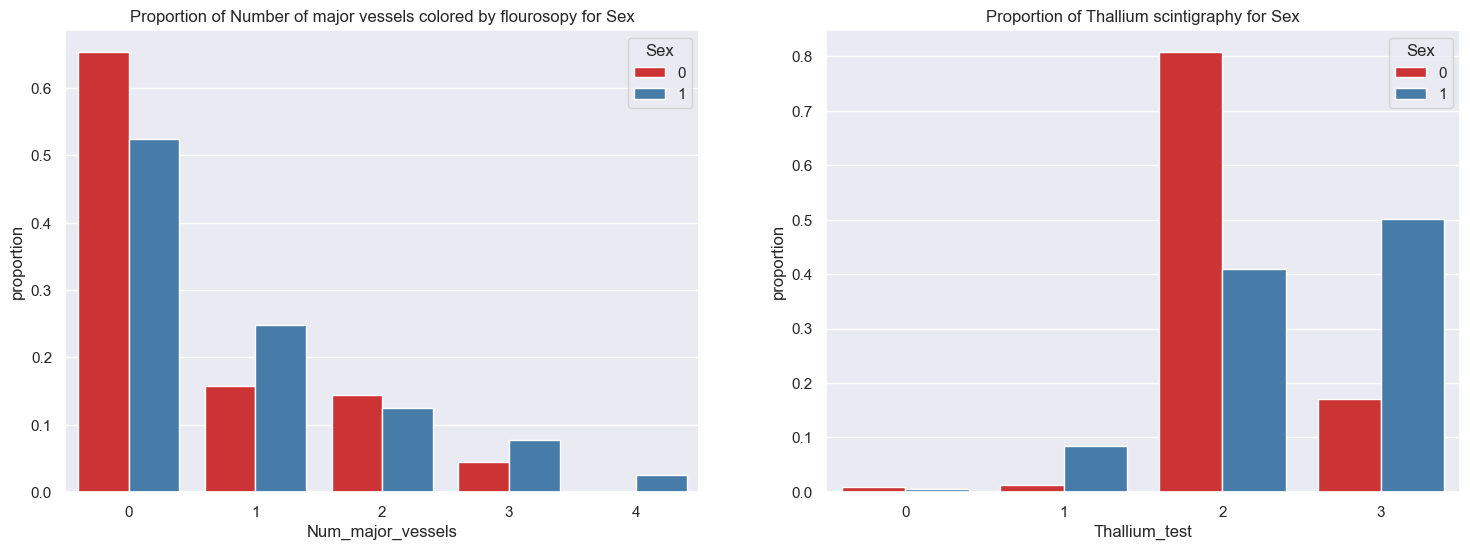

In [33]:
#Plot proportions of Num_major_vessels and Thallium_test for Sex.
plt.figure(figsize=(18, 6))

# Num_major_vessels
plt.subplot(1, 2, 1)
df['Num_major_vessels'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

# Thallium test
plt.subplot(1, 2, 2)
df['Thallium_test'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
plt.title('Proportion of Thallium scintigraphy for Sex')
plt.show()


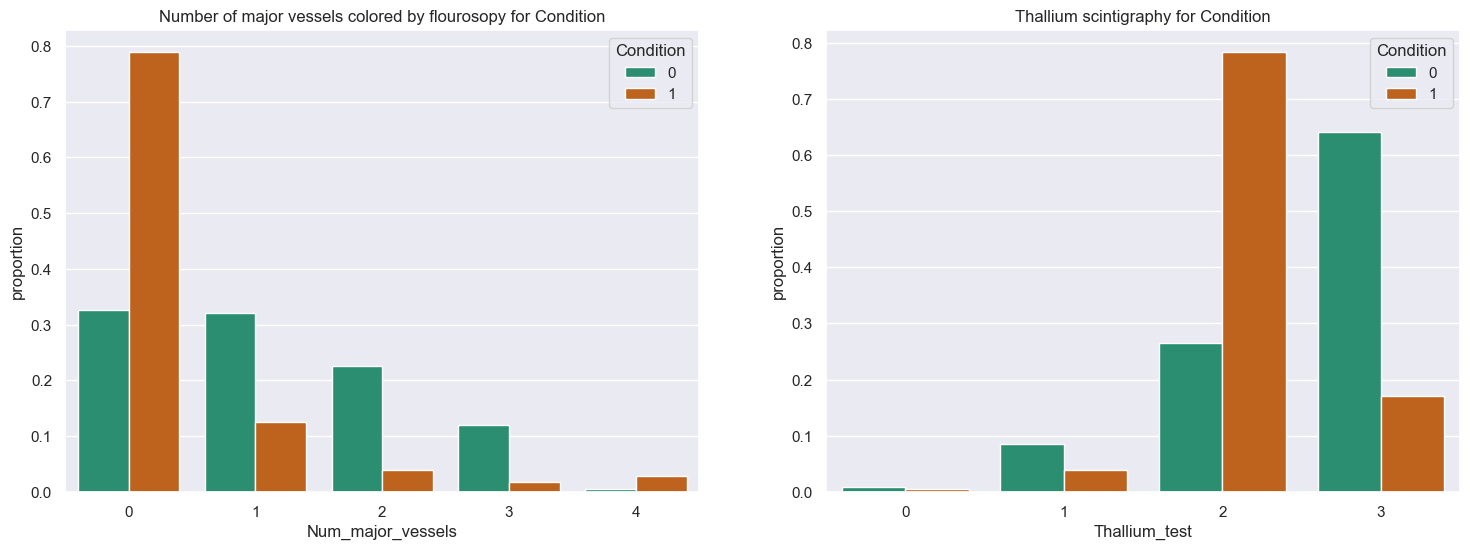

In [34]:
# Plot proportions of Num_major_vessels and Thallium_test for Condition.

plt.figure(figsize=(18, 6))

# Num_major_vessels
plt.subplot(1, 2, 1)
df['Num_major_vessels'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
plt.title('Number of major vessels colored by flourosopy for Condition')

# ST_slope
plt.subplot(1, 2, 2)
df['Thallium_test'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
plt.title('Thallium scintigraphy for Condition')
plt.show()

<Axes: xlabel='Age'>

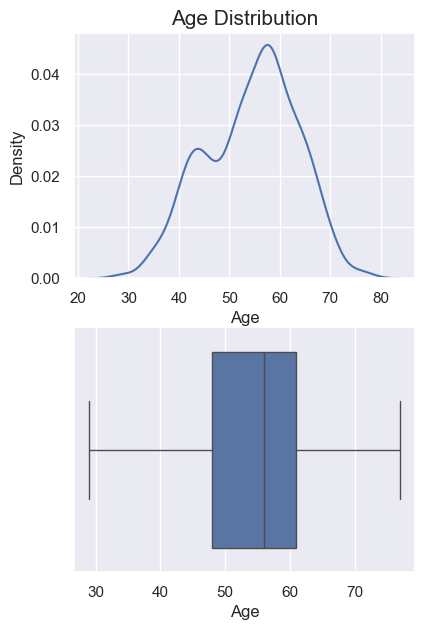

In [35]:
# Make a standard distribution and distributions for Sex

fig = plt.figure(figsize=(15, 7))

# Age distribution
plt.subplot(2, 3, 1)
sns.kdeplot(df['Age']) 
plt.title('Age Distribution', fontsize=15)

plt.subplot(2, 3, 4)
sns.boxplot(df['Age'], orient='h')


<Axes: xlabel='Age', ylabel='Sex'>

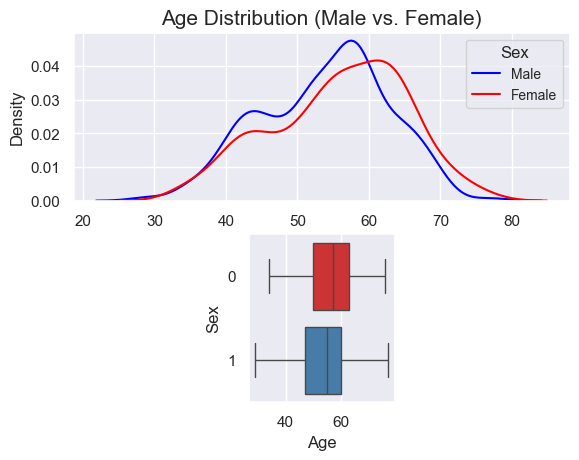

In [36]:
# Age distribution for sex
plt.subplot(2, 1, 1)
female = df[df['Sex']==0]['Age']
male = df[df['Sex']==1]['Age']
sns.kdeplot(male, color='Blue', label='Male')
sns.kdeplot(female, color='Red', label='Female')
plt.title('Age Distribution (Male vs. Female)', fontsize=15)
plt.legend(title='Sex', fontsize=10)

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Age'], y=df['Sex'], orient='h', palette='Set1',hue=df['Sex'],legend=False)


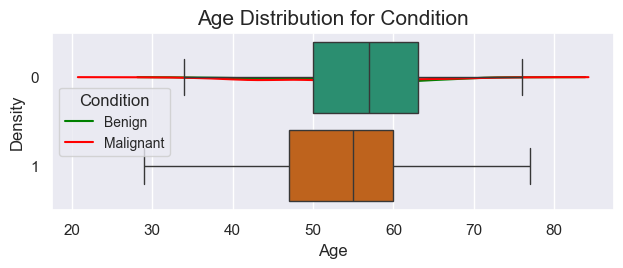

In [37]:
# Age distribution for Condition
plt.subplot(2, 1, 1)
benign = df[df['Condition']==0]['Age']
malignant = df[df['Condition']==1]['Age']

sns.kdeplot(benign, color='Green', label='Benign')
sns.kdeplot(malignant, color='Red', label='Malignant')
plt.title('Age Distribution for Condition', fontsize=15)
plt.legend(title='Condition', fontsize=10)

plt.subplot(2, 1, 1)
sns.boxplot(x=df['Age'], y=df['Sex'], orient='h', palette='Dark2',hue=df['Sex'],legend=False)

plt.tight_layout()
plt.show()

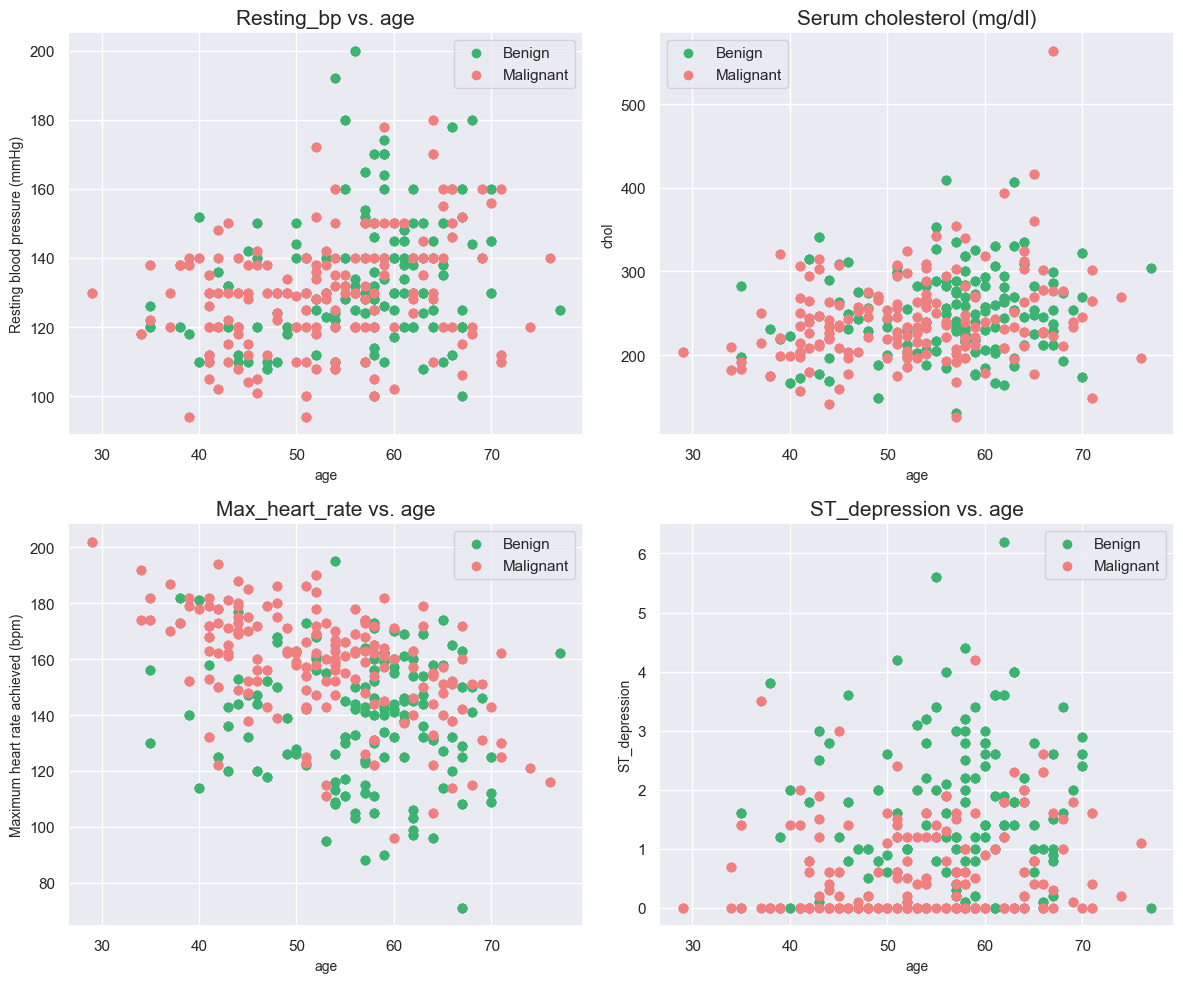

In [38]:
# Effects of features for heart disease by age

benign = df.Condition==0
malignant = df.Condition==1

age_benign = df.Age[benign]
age_malignant = df.Age[malignant]

b_color = 'MediumSeaGreen'
m_color = 'LightCoral'

fig = plt.figure(figsize=(12, 10))

# Resting blood pressure (mmHg) 
plt.subplot(2, 2, 1)
plt.scatter(x=age_benign, y=df.Resting_bp[benign], color=b_color)
plt.scatter(x=age_malignant, y=df.Resting_bp[malignant], color=m_color)
plt.title('Resting_bp vs. age', fontsize=15)
plt.legend(['Benign', 'Malignant'])
plt.xlabel('age', fontsize=10)
plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


# Serum Cholesterol (mg/dl) 
plt.subplot(2, 2, 2)
plt.scatter(x=age_benign, y=df.Cholesterol[benign], color=b_color)
plt.scatter(x=age_malignant, y=df.Cholesterol[malignant], color=m_color)
plt.title('Serum cholesterol (mg/dl)', fontsize=15)
plt.legend(['Benign', 'Malignant'])
plt.xlabel('age', fontsize=10)
plt.ylabel('chol', fontsize=10)
 

# Maximum heart rate achieved (bpm)
plt.subplot(2, 2, 3)
plt.scatter(x=age_benign, y=df.Max_heart_rate[benign], color=b_color)
plt.scatter(x=age_malignant, y=df.Max_heart_rate[malignant], color=m_color)
plt.title('Max_heart_rate vs. age', fontsize=15)
plt.legend(['Benign', 'Malignant'])
plt.xlabel('age',fontsize=10)
plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


# ST_depression
plt.subplot(2, 2, 4)
plt.scatter(x=age_benign, y=df.ST_depression[benign], color=b_color)
plt.scatter(x=age_malignant, y=df.ST_depression[malignant], color=m_color)
plt.title('ST_depression vs. age', fontsize=15)
plt.legend(['Benign', 'Malignant'])
plt.xlabel('age',fontsize=10)
plt.ylabel('ST_depression', fontsize=10)   

plt.tight_layout()
plt.show()

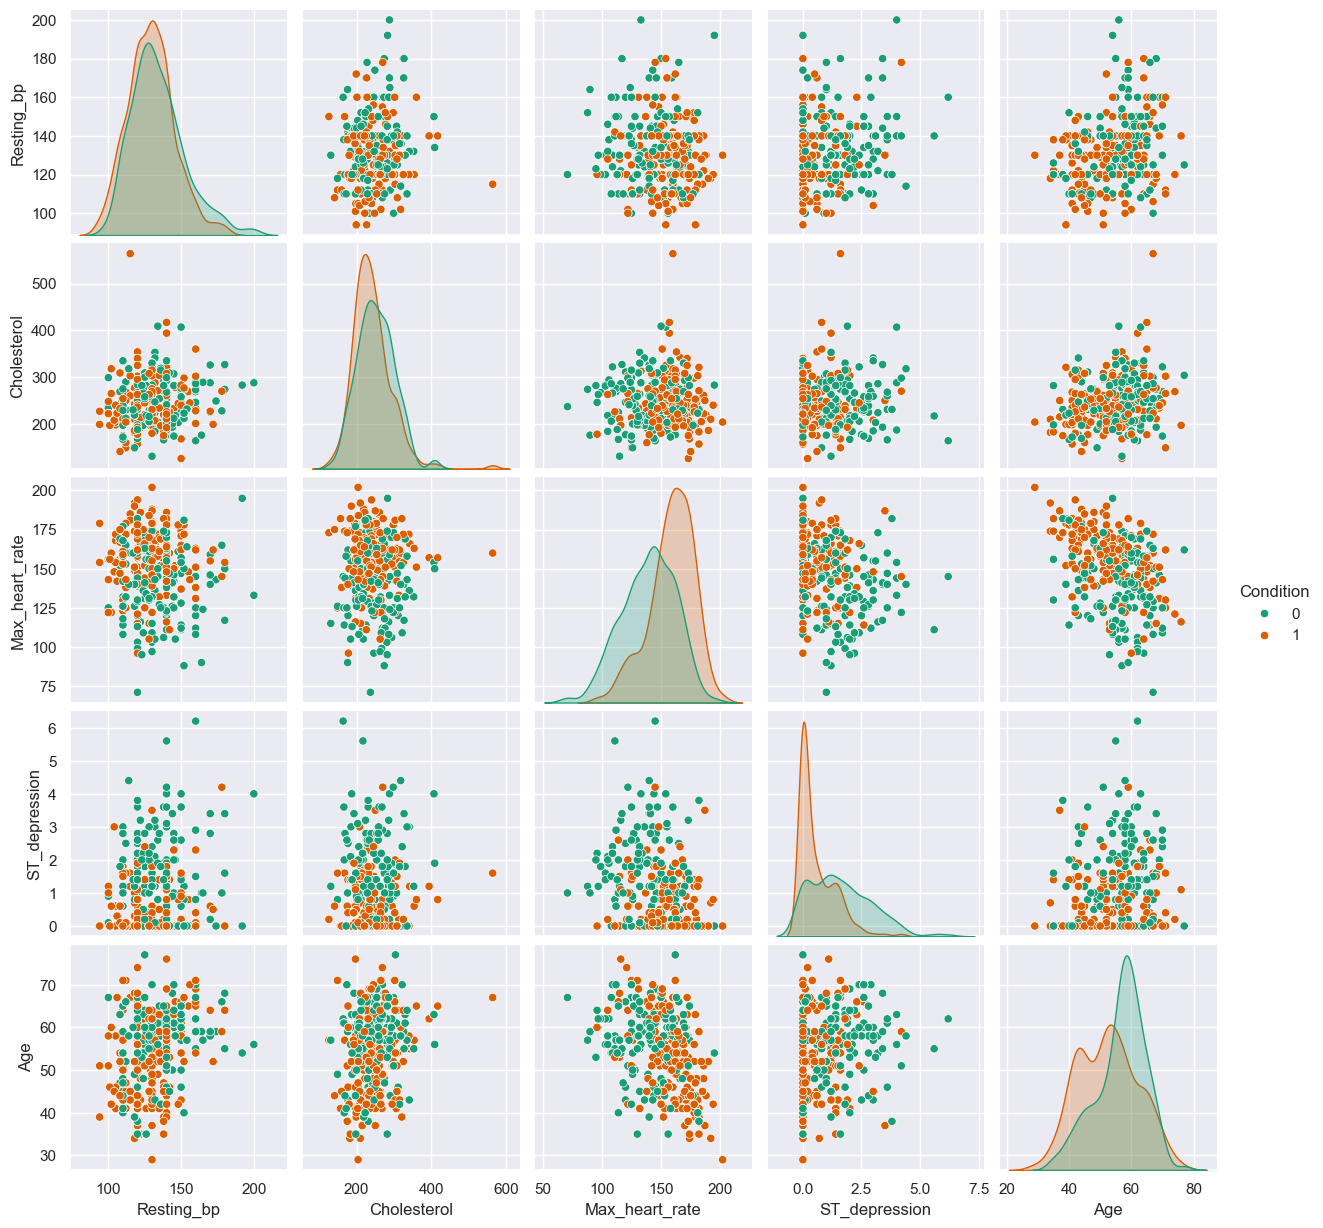

In [39]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

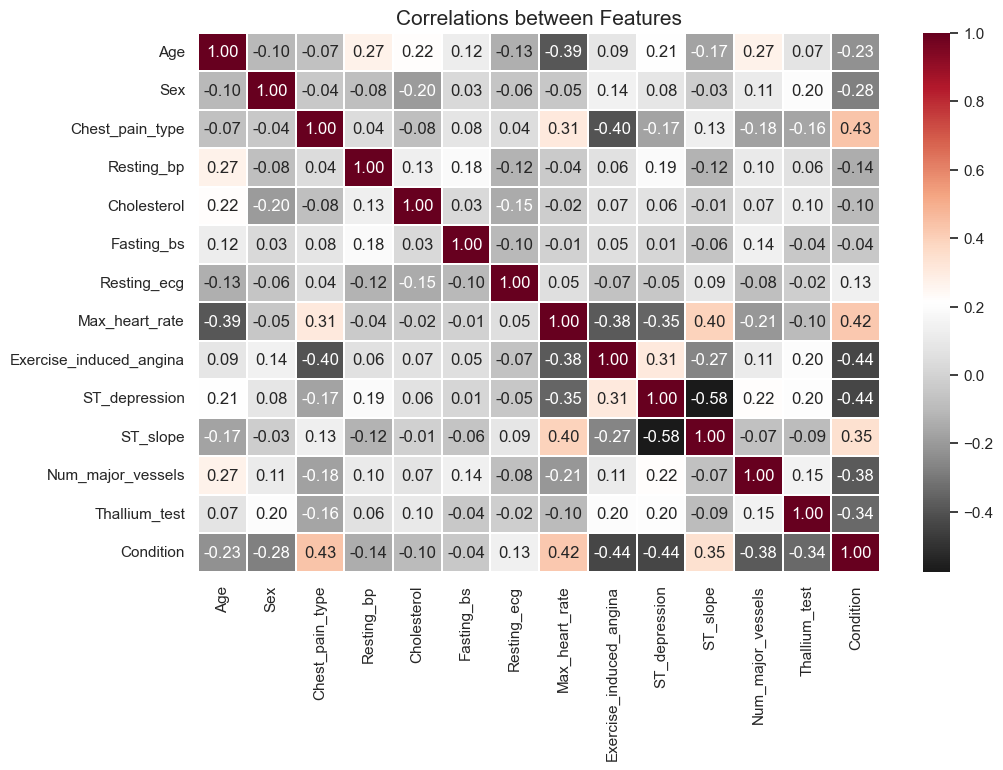

In [40]:
# Correlation Heat Map of the features.

plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.2, fmt='.2f', cmap='RdGy_r')
plt.title('Correlations between Features', fontsize=15)
plt.show()


In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# For Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  auc
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

In [44]:
def get_train_test_split(data):
    X = data.drop(['Condition'], axis=1)
    y = data.Condition
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
    print(f'Shape of X_train {X_train.shape}')
    print(f'Shape of X_test {X_test.shape}')
    print(f'Shape of y_train {y_train.shape}')
    print(f'Shape of y_test {y_test.shape}')
    return X_train, X_test, y_train, y_test    

X_train, X_test, y_train, y_test = get_train_test_split(df);    

Shape of X_train (820, 13)
Shape of X_test (205, 13)
Shape of y_train (820,)
Shape of y_test (205,)


In [45]:
def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train);
X_test = get_normalization(X_test);

In [46]:
#Logistic Regression
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [49]:
def get_model_accuracy(model, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    return model_acc

In [50]:
logreg_acc = get_model_accuracy(logreg, X_test, y_test)
print(f'Logistic Regression Accuracy: {logreg_acc:.4}')
print()

y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_pred_logreg, y_test))

Logistic Regression Accuracy: 0.8049

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        86
           1       0.88      0.76      0.82       119

    accuracy                           0.80       205
   macro avg       0.80      0.81      0.80       205
weighted avg       0.82      0.80      0.81       205



In [51]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

In [52]:
# Accuracy score for Random Forest
rf_acc = get_model_accuracy(rf_model, X_test, y_test)
print(f'RandomForestClassifier Accuracy: {rf_acc:.4}')
print()

# Predict class for X_test
y_pred_rf = rf_model.predict(X_test)

# Classification Report of Random Forest model
print(classification_report(y_pred_rf, y_test))

RandomForestClassifier Accuracy: 0.9854

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [53]:
# Build and fit Support Vestor Classification model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

# Accuracy score for svm_model
svm_acc = get_model_accuracy(svm_model, X_test, y_test)
print(f'SVM Accuracy: {svm_acc:.4}')
print()

# Predict class for X_test
y_pred_svm = svm_model.predict(X_test)

# Classification Report of svm_model
print(classification_report(y_pred_svm, y_test))

SVM Accuracy: 0.8683

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        99
           1       0.88      0.86      0.87       106

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [54]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

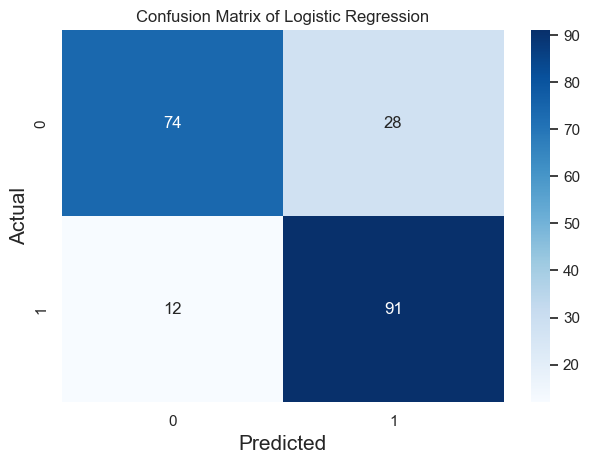

In [56]:
# Logistic Regression model
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(y_test, y_pred_logreg, 'Blues', title);

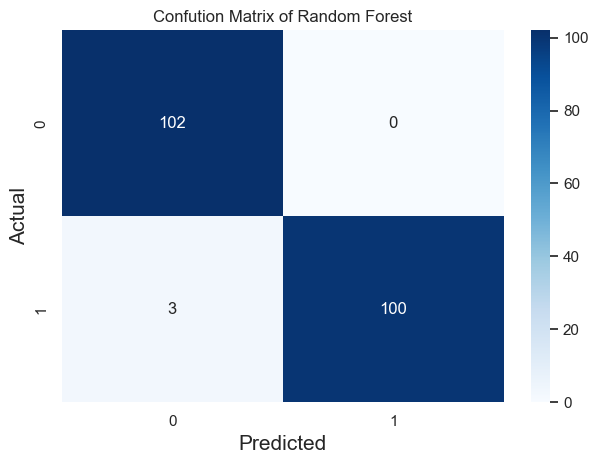

In [57]:
title = 'Confution Matrix of Random Forest'
plot_confusion_matrix(y_test, y_pred_rf, 'Blues', title);

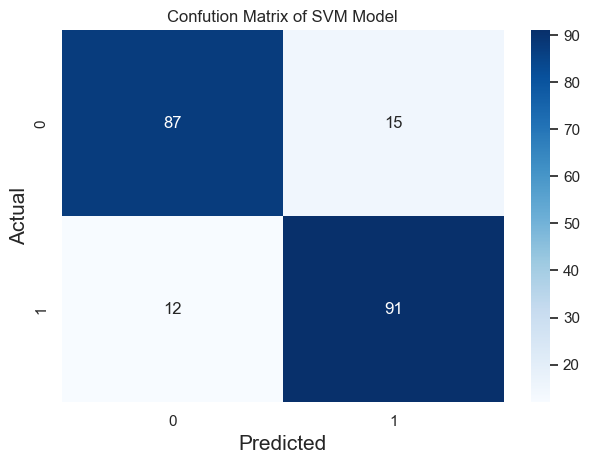

In [58]:
title = 'Confution Matrix of SVM Model'
plot_confusion_matrix(y_test, y_pred_svm, 'Blues', title);

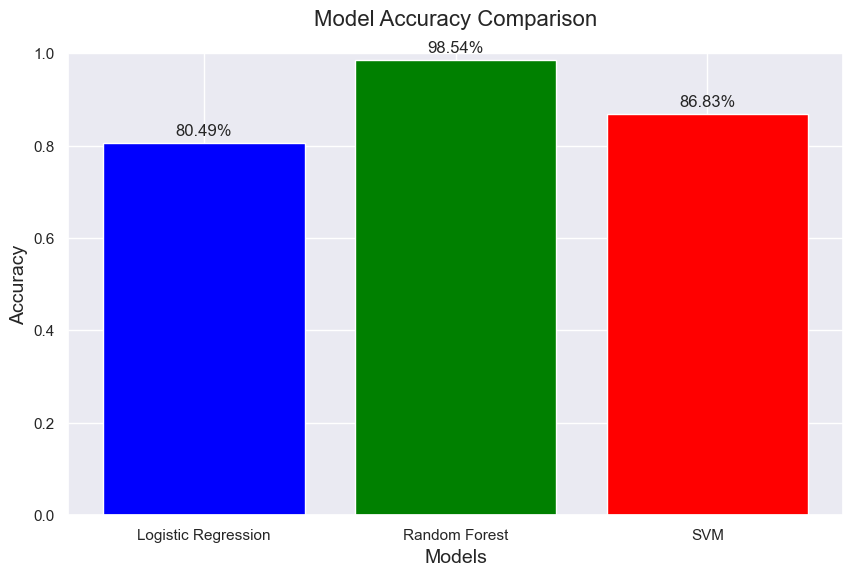

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'SVM']

# Accuracy values as percentages
accuracy_percentages = ['80.49%', '98.54%', '86.83%']

# Convert percentage strings to floating-point numbers
accuracies = [float(acc.strip('%')) / 100 for acc in accuracy_percentages]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom')

# Adding title and labels
ax.set_title('Model Accuracy Comparison', fontsize=16, pad=20)  # Adjusted title position
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim([0, 1])

# Display the plot
plt.show()
